In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pwd

/content/drive/My Drive


In [0]:
cd ./drive/My\ Drive

[Errno 2] No such file or directory: './drive/My Drive'
/content/drive/My Drive


In [0]:
pwd

'/content/drive/My Drive'

In [0]:
ls -l final_cleaned_data_ML_sentiments.csv

-rw------- 2 root root 31022613 Nov 24 21:59 final_cleaned_data_ML_sentiments.csv


In [0]:
ls -l final_cleaned_data_ML.csv

-rw------- 2 root root 29152887 Nov 24 21:40 final_cleaned_data_ML.csv


In [0]:
############################ Experiments without using sentiment features #####################################################################################################################

In [0]:
df = pd.read_csv("final_cleaned_data_ML.csv")

In [0]:
df.head()

,goal,staff_pick,slug_length,state_bool,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,...,launch_month_7,launch_month_8,launch_month_9,launch_month_10,launch_month_11,launch_month_12,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,5000.0,1,33,1,30.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,24042.0,1,34,1,27.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4000.0,0,8,0,60.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,500.0,0,29,1,19.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2500.0,0,26,1,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
df.columns

Index(['goal', 'staff_pick', 'slug_length', 'state_bool', 'campaign_days',
       'creation_to_launch_days', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US', 'category_art',
       'category_comics', 'category_crafts', 'category_dance',
       'category_design', 'category_fashion', 'category_film & video',
       'category_food', 'category_games', 'category_journalism',
       'category_music', 'category_photography', 'category_publishing',
       'category_technology', 'category_theater', 'blurb_length',
       'name_length', 'launch_month_1', 'launch_month_2', 'launch_month_3',
       'launch_month_4', 'launch_month_5', 'launch_month_6', 'launch_month_7',
       'launch_month_8', 'launch_month_9', 'lau

In [0]:
# Staff pick
df.staff_pick.value_counts()

0    148082
1     21880
Name: staff_pick, dtype: int64

In [0]:
only_success = df[df.state_bool == 1]
only_failed = df[df.state_bool == 0]

In [0]:
only_success.staff_pick.value_counts()

0    77102
1    19666
Name: staff_pick, dtype: int64

In [0]:
only_failed.staff_pick.value_counts()

0    70980
1     2214
Name: staff_pick, dtype: int64

In [0]:
# working with only the successful ones
X_temp = only_success.drop(['state_bool', 'staff_pick'], axis=1)
y = only_success.staff_pick

print("Length of X_temp is {}".format(len(X_temp)))
print("Length of y is {}".format(len(y)))

Length of X_temp is 96768
Length of y is 96768


In [0]:
X_temp.head()

,goal,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,...,launch_month_7,launch_month_8,launch_month_9,launch_month_10,launch_month_11,launch_month_12,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,5000.0,33,30.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,24042.0,34,27.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,500.0,29,19.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2500.0,26,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1500.0,33,28.0,229.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
##########Pre-processing############
########### Standardizing the data ################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X_temp), columns=list(X_temp.columns))
X.head()

,goal,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,...,launch_month_7,launch_month_8,launch_month_9,launch_month_10,launch_month_11,launch_month_12,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,-0.029513,-0.041434,-0.095447,-0.315531,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.3064,-0.282971,-0.28906,-0.312953,-0.300286,-0.228731,2.157081,-0.522794,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,3.098023,-0.30771,-0.29916,-0.266568,-0.237673,-0.328513,-0.31816,-0.323723,-0.329246,-0.304945,-0.293652,-0.2759
1,0.037179,0.032985,-0.374229,-0.232231,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.3064,-0.282971,-0.28906,-0.312953,-0.300286,-0.228731,-0.463590,1.912800,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,3.044022,-0.31816,-0.323723,-0.329246,-0.304945,-0.293652,-0.2759
2,-0.045274,-0.339107,-1.117647,-0.323103,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.3064,-0.282971,-0.28906,-0.312953,-0.300286,-0.228731,-0.463590,1.912800,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,-0.328513,-0.31816,3.089065,-0.329246,-0.304945,-0.293652,-0.2759
3,-0.038269,-0.562362,-0.095447,-0.383684,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.3064,-0.282971,-0.28906,-0.312953,-0.300286,-0.228731,2.157081,-0.522794,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,3.044022,-0.31816,-0.323723,-0.329246,-0.304945,-0.293652,-0.2759
4,-0.041772,-0.041434,-0.281302,1.350452,-0.038064,7.075656,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.3064,-0.282971,-0.28906,3.195369,-0.300286,-0.228731,-0.463590,-0.522794,-0.463211,-0.424226,-0.41131,-0.283247,3.947305,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,-0.328513,-0.31816,-0.323723,-0.329246,-0.304945,3.405396,-0.2759


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Length of training set is {}".format(len(X_train)))
print("Length of test set is {}".format(len(X_test)))

print("Shape of X_train is {}".format(X_train.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_test is {}".format(y_test.shape))

Length of training set is 67737
Length of test set is 29031
Shape of X_train is (67737, 74)
Shape of y_train is (67737,)
Shape of X_test is (29031, 74)
Shape of y_test is (29031,)


In [0]:
############## Logistic Regression Model ##############
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_pred = logisticRegr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7992146326340808
0.7992146326340808
0.05755860953920775


In [0]:
from sklearn.metrics import classification_report
y_pred = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     23145
           1       0.60      0.03      0.06      5886

    accuracy                           0.80     29031
   macro avg       0.70      0.51      0.47     29031
weighted avg       0.76      0.80      0.72     29031



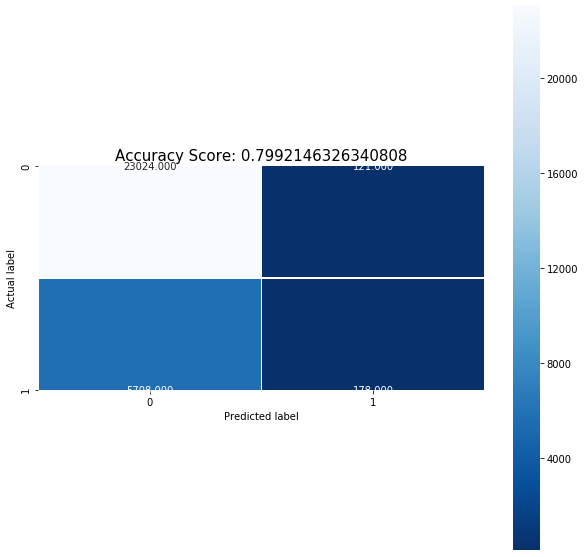

In [0]:
###### To plot the confusion matrix ############
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

In [0]:
################################## Decision Trees ###################################
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


0.7171988563948882
0.32749017038007866


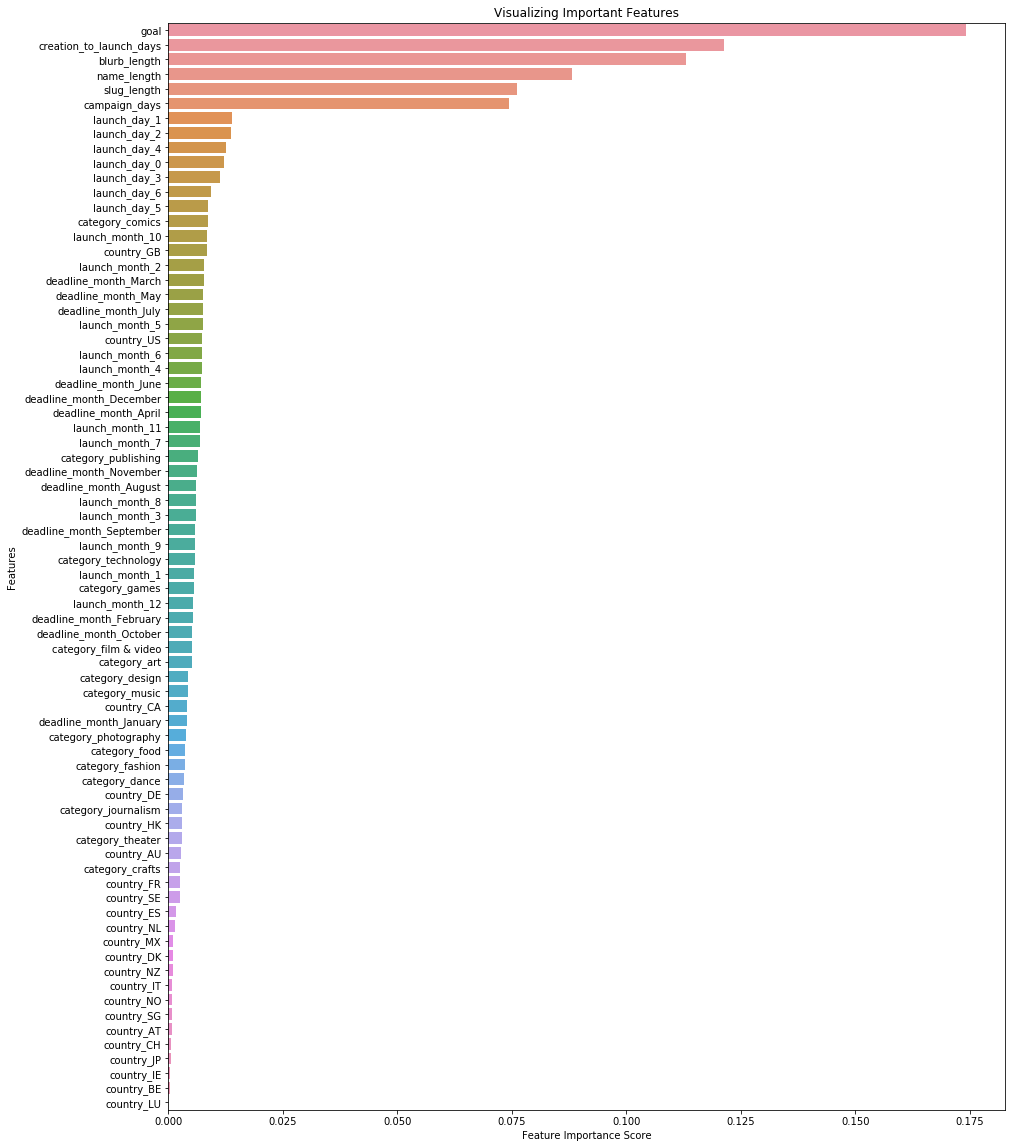

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
################################## SVM ###################################
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7981468085839275
0.018754186202277295


In [0]:
################ Random Forests ##############3
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     23145
           1       0.58      0.15      0.24      5886

    accuracy                           0.81     29031
   macro avg       0.70      0.56      0.56     29031
weighted avg       0.77      0.81      0.76     29031



In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8059660363060177
0.237237643872715


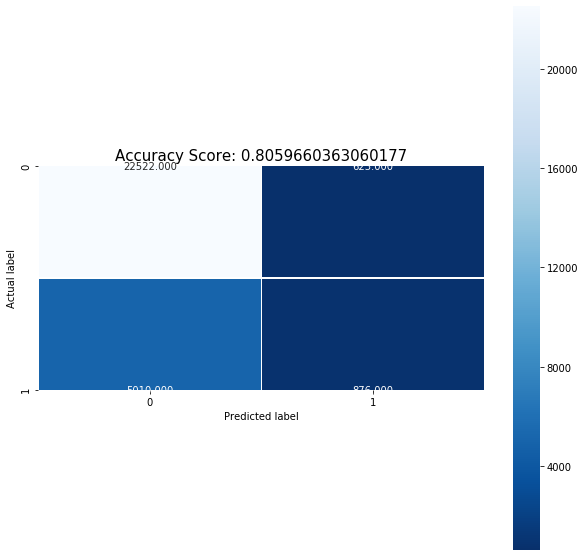

In [0]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

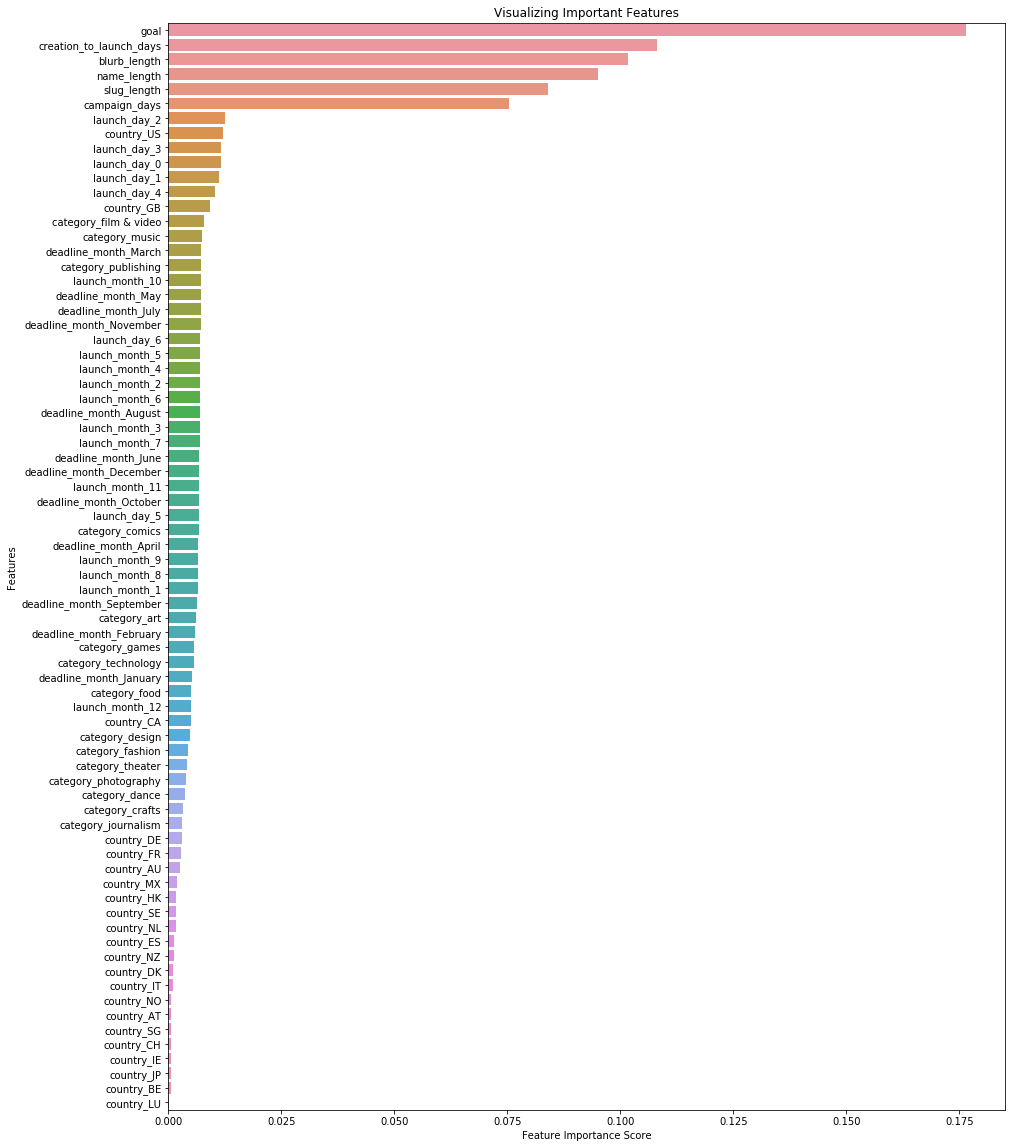

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
############################# Doing sampling to deal with the problem of class imbalance ##############################################

X_picked = only_success[only_success.staff_pick == 1]
X_not_picked = only_success[only_success.staff_pick == 0].sample(frac=0.30)





In [0]:
len(X_not_picked)

23131

In [0]:
len(X_picked)

19666

In [0]:
only_success_sampled = pd.concat([X_picked,X_not_picked])


In [0]:
# working with only the successful ones
X_temp = only_success_sampled.drop(['state_bool', 'staff_pick'], axis=1)
y = only_success_sampled.staff_pick

print("Length of X_temp is {}".format(len(X_temp)))
print("Length of y is {}".format(len(y)))

Length of X_temp is 42797
Length of y is 42797


In [0]:
##########Pre-processing############
########### Standardizing the data ################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X_temp), columns=list(X_temp.columns))
X.head()

,goal,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,...,launch_month_7,launch_month_8,launch_month_9,launch_month_10,launch_month_11,launch_month_12,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,-0.034467,-0.060855,-0.120644,-0.332593,-0.0387,-0.136782,-0.040765,-0.20838,-0.047415,-0.118637,-0.061642,-0.079233,-0.109929,-0.358834,-0.067655,-0.042455,-0.073023,-0.047167,-0.016747,-0.101217,-0.080566,-0.041336,-0.062401,-0.076035,-0.053248,...,-0.303425,-0.28447,-0.295269,-0.315349,-0.304067,-0.22835,2.122199,-0.540284,-0.469876,-0.420448,-0.395309,-0.270452,-0.24807,3.157208,-0.306218,-0.302506,-0.268607,-0.237548,-0.323655,-0.318385,-0.323655,-0.326686,-0.306674,-0.301584,-0.276669
1,0.011661,0.013075,-0.408843,-0.252406,-0.0387,-0.136782,-0.040765,-0.20838,-0.047415,-0.118637,-0.061642,-0.079233,-0.109929,-0.358834,-0.067655,-0.042455,-0.073023,-0.047167,-0.016747,-0.101217,-0.080566,-0.041336,-0.062401,-0.076035,-0.053248,...,-0.303425,-0.28447,-0.295269,-0.315349,-0.304067,-0.22835,-0.471209,1.850878,-0.469876,-0.420448,-0.395309,-0.270452,-0.24807,-0.316736,-0.306218,-0.302506,-0.268607,-0.237548,3.089713,-0.318385,-0.323655,-0.326686,-0.306674,-0.301584,-0.276669
2,-0.022355,-0.060855,-0.120644,-0.288855,-0.0387,-0.136782,-0.040765,-0.20838,-0.047415,-0.118637,-0.061642,-0.079233,-0.109929,-0.358834,-0.067655,-0.042455,-0.073023,-0.047167,-0.016747,-0.101217,-0.080566,-0.041336,-0.062401,-0.076035,-0.053248,...,-0.303425,-0.28447,-0.295269,-0.315349,-0.304067,-0.22835,-0.471209,-0.540284,-0.469876,2.378417,-0.395309,-0.270452,-0.24807,3.157208,-0.306218,-0.302506,-0.268607,-0.237548,-0.323655,-0.318385,-0.323655,-0.326686,-0.306674,-0.301584,-0.276669
3,0.122991,-0.356573,-1.081309,-0.310724,-0.0387,7.310890,-0.040765,-0.20838,-0.047415,-0.118637,-0.061642,-0.079233,-0.109929,-0.358834,-0.067655,-0.042455,-0.073023,-0.047167,-0.016747,-0.101217,-0.080566,-0.041336,-0.062401,-0.076035,-0.053248,...,-0.303425,-0.28447,-0.295269,-0.315349,-0.304067,-0.22835,-0.471209,-0.540284,2.128222,-0.420448,-0.395309,-0.270452,-0.24807,-0.316736,-0.306218,-0.302506,-0.268607,-0.237548,-0.323655,-0.318385,3.089713,-0.326686,-0.306674,-0.301584,-0.276669
4,-0.019932,-0.874081,-0.024577,-0.266985,-0.0387,-0.136782,-0.040765,-0.20838,-0.047415,-0.118637,-0.061642,-0.079233,-0.109929,2.786805,-0.067655,-0.042455,-0.073023,-0.047167,-0.016747,-0.101217,-0.080566,-0.041336,-0.062401,-0.076035,-0.053248,...,-0.303425,-0.28447,-0.295269,-0.315349,-0.304067,-0.22835,-0.471209,1.850878,-0.469876,-0.420448,-0.395309,-0.270452,-0.24807,-0.316736,-0.306218,-0.302506,-0.268607,-0.237548,-0.323655,-0.318385,-0.323655,3.061046,-0.306674,-0.301584,-0.276669


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Length of training set is {}".format(len(X_train)))
print("Length of test set is {}".format(len(X_test)))

print("Shape of X_train is {}".format(X_train.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_test is {}".format(y_test.shape))

Length of training set is 29957
Length of test set is 12840
Shape of X_train is (29957, 74)
Shape of y_train is (29957,)
Shape of X_test is (12840, 74)
Shape of y_test is (12840,)


In [0]:
############## Logistic Regression Model ##############
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_pred = logisticRegr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6517133956386293
0.6517133956386293
0.5704130643611912


In [0]:
from sklearn.metrics import classification_report
y_pred = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      6948
           1       0.66      0.50      0.57      5892

    accuracy                           0.65     12840
   macro avg       0.65      0.64      0.64     12840
weighted avg       0.65      0.65      0.64     12840



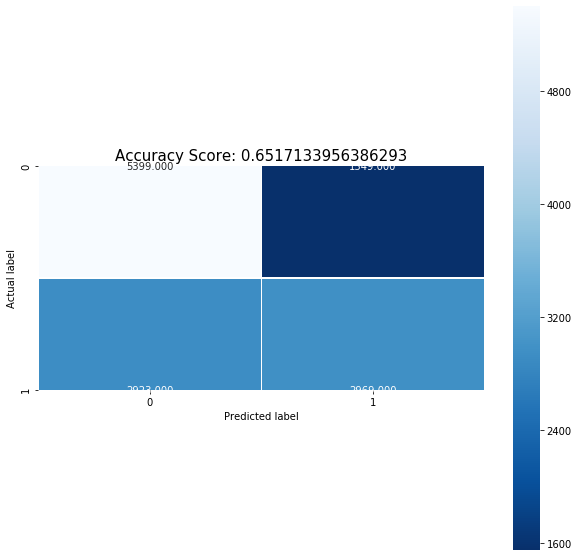

In [0]:
###### To plot the confusion matrix ############
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

In [0]:
################################## Decision Trees ###################################
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5948598130841122
0.5611607896068839


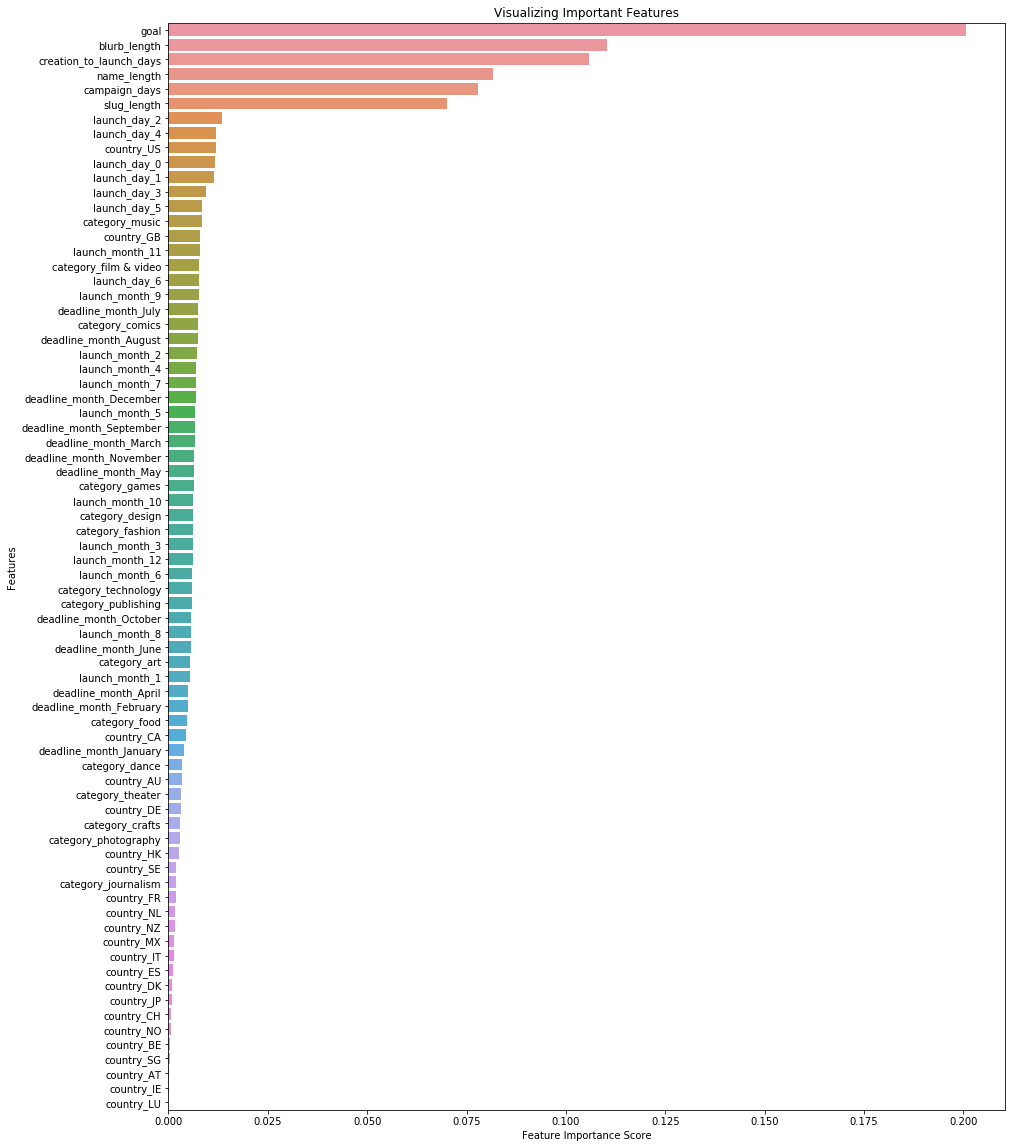

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
################ Random Forests ##############3
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6948
           1       0.67      0.61      0.64      5892

    accuracy                           0.69     12840
   macro avg       0.68      0.68      0.68     12840
weighted avg       0.68      0.69      0.68     12840



In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6858255451713395
0.6407836153161177


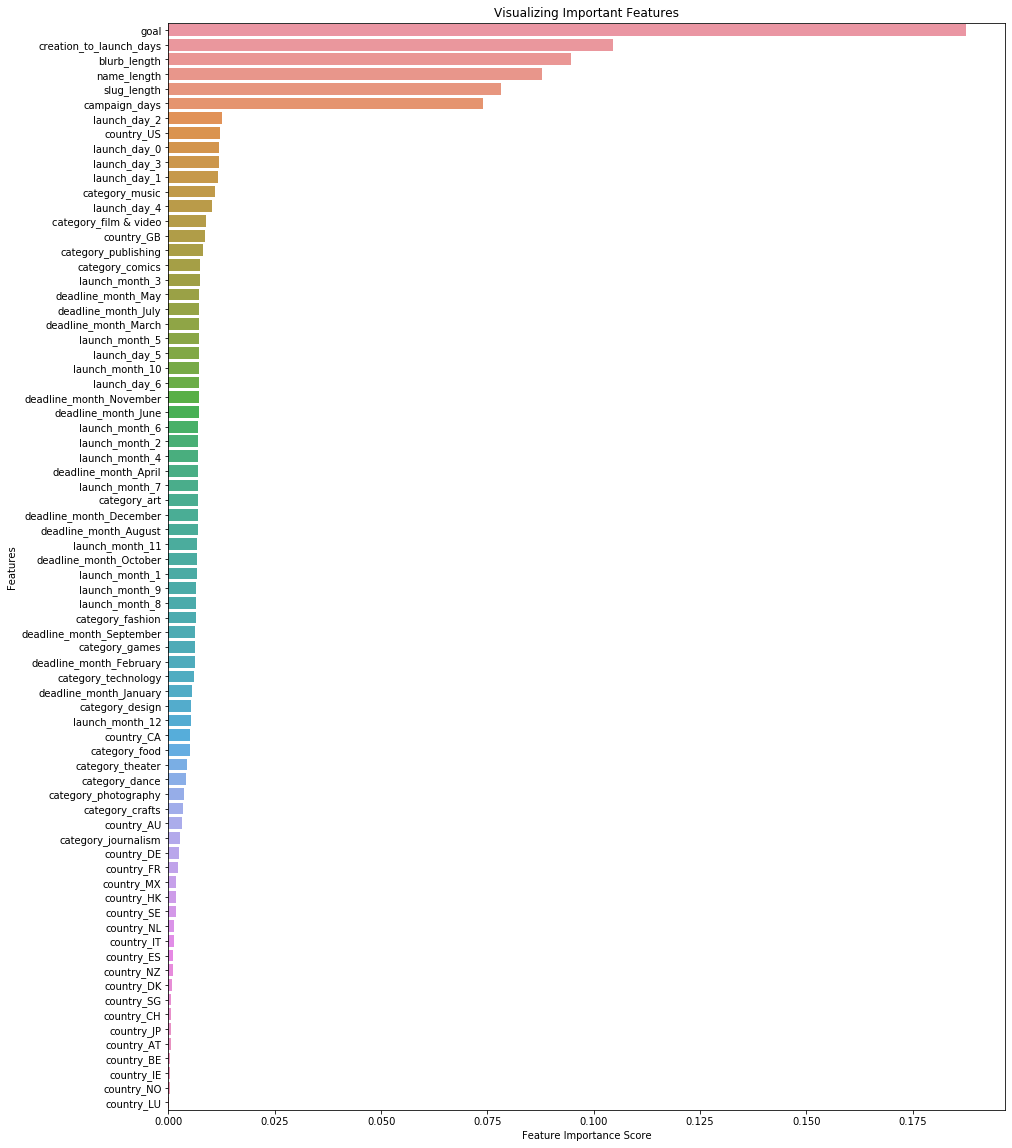

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
################################## SVM ###################################
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6161993769470405
0.5562758869079777


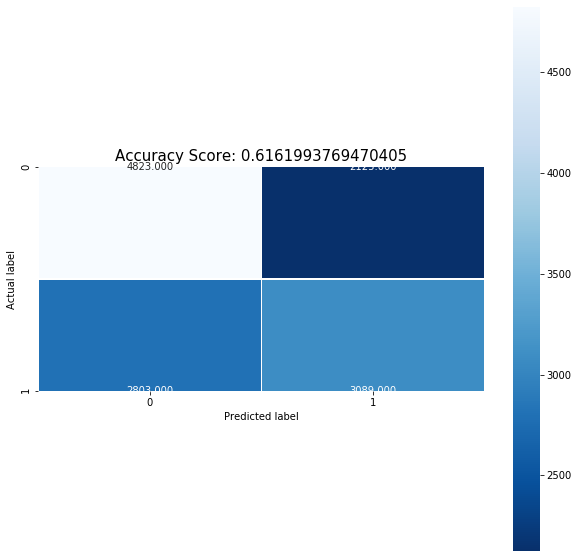

In [0]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

In [0]:
#################################################################################### Experiments with sentiment features ################################################################################

In [0]:
df = pd.read_csv("final_cleaned_data_ML_sentiments.csv")

In [0]:
df.head()

,goal,staff_pick,slug_length,state_bool,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,...,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,name_sentiment_negative,name_sentiment_neutral,name_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,blurb_sentiment_positive
0,5000.0,1,33,1,30.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,24042.0,1,34,1,27.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,4000.0,0,8,0,60.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,500.0,0,29,1,19.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,2500.0,0,26,1,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
df.columns

Index(['goal', 'staff_pick', 'slug_length', 'state_bool', 'campaign_days',
       'creation_to_launch_days', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US', 'category_art',
       'category_comics', 'category_crafts', 'category_dance',
       'category_design', 'category_fashion', 'category_film & video',
       'category_food', 'category_games', 'category_journalism',
       'category_music', 'category_photography', 'category_publishing',
       'category_technology', 'category_theater', 'blurb_length',
       'name_length', 'launch_month_1', 'launch_month_2', 'launch_month_3',
       'launch_month_4', 'launch_month_5', 'launch_month_6', 'launch_month_7',
       'launch_month_8', 'launch_month_9', 'lau

In [0]:
# Staff pick
df.staff_pick.value_counts()

0    148082
1     21880
Name: staff_pick, dtype: int64

In [0]:
only_success = df[df.state_bool == 1]
only_failed = df[df.state_bool == 0]

In [0]:
only_success.staff_pick.value_counts()

0    77102
1    19666
Name: staff_pick, dtype: int64

In [0]:
only_failed.staff_pick.value_counts()

0    70980
1     2214
Name: staff_pick, dtype: int64

In [0]:
# working with only the successful ones
X_temp = only_success.drop(['state_bool', 'staff_pick'], axis=1)
y = only_success.staff_pick

print("Length of X_temp is {}".format(len(X_temp)))
print("Length of y is {}".format(len(y)))

Length of X_temp is 96768
Length of y is 96768


In [0]:
X_temp.head()

,goal,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,...,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,name_sentiment_negative,name_sentiment_neutral,name_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,blurb_sentiment_positive
0,5000.0,33,30.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,24042.0,34,27.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,500.0,29,19.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,2500.0,26,30.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
5,1500.0,33,28.0,229.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [0]:
##########Pre-processing############
########### Standardizing the data ################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X_temp), columns=list(X_temp.columns))
X.head()

,goal,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,...,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,name_sentiment_negative,name_sentiment_neutral,name_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,blurb_sentiment_positive
0,-0.029513,-0.041434,-0.095447,-0.315531,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,2.157081,-0.522794,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,3.098023,-0.30771,-0.29916,-0.266568,-0.237673,-0.328513,-0.31816,-0.323723,-0.329246,-0.304945,-0.293652,-0.2759,-0.567056,-0.041578,0.569713,-0.471680,-0.016394,0.472105
1,0.037179,0.032985,-0.374229,-0.232231,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.463590,1.912800,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,3.044022,-0.31816,-0.323723,-0.329246,-0.304945,-0.293652,-0.2759,-0.567056,-0.041578,0.569713,-0.471680,-0.016394,0.472105
2,-0.045274,-0.339107,-1.117647,-0.323103,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.463590,1.912800,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,-0.328513,-0.31816,3.089065,-0.329246,-0.304945,-0.293652,-0.2759,-0.567056,-0.041578,0.569713,2.120082,-0.016394,-2.118171
3,-0.038269,-0.562362,-0.095447,-0.383684,-0.038064,-0.141330,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,2.157081,-0.522794,-0.463211,-0.424226,-0.41131,-0.283247,-0.253337,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,3.044022,-0.31816,-0.323723,-0.329246,-0.304945,-0.293652,-0.2759,-0.567056,-0.041578,0.569713,-0.471680,-0.016394,0.472105
4,-0.041772,-0.041434,-0.281302,1.350452,-0.038064,7.075656,-0.044237,-0.212503,-0.048811,-0.112386,-0.064588,-0.083624,-0.108796,-0.361513,-0.073787,-0.048491,-0.07745,-0.041453,-0.016706,-0.089736,-0.078323,-0.043647,-0.06531,-0.077179,-0.055859,...,-0.463590,-0.522794,-0.463211,-0.424226,-0.41131,-0.283247,3.947305,-0.322787,-0.30771,-0.29916,-0.266568,-0.237673,-0.328513,-0.31816,-0.323723,-0.329246,-0.304945,3.405396,-0.2759,-0.567056,-0.041578,0.569713,2.120082,-0.016394,-2.118171


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Length of training set is {}".format(len(X_train)))
print("Length of test set is {}".format(len(X_test)))

print("Shape of X_train is {}".format(X_train.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_test is {}".format(y_test.shape))

Length of training set is 67737
Length of test set is 29031
Shape of X_train is (67737, 80)
Shape of y_train is (67737,)
Shape of X_test is (29031, 80)
Shape of y_test is (29031,)


In [0]:
############## Logistic Regression Model ##############
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_pred = logisticRegr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7992835245082842
0.7992835245082842
0.05788197251414713


In [0]:
from sklearn.metrics import classification_report
y_pred = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     23145
           1       0.60      0.03      0.06      5886

    accuracy                           0.80     29031
   macro avg       0.70      0.51      0.47     29031
weighted avg       0.76      0.80      0.72     29031



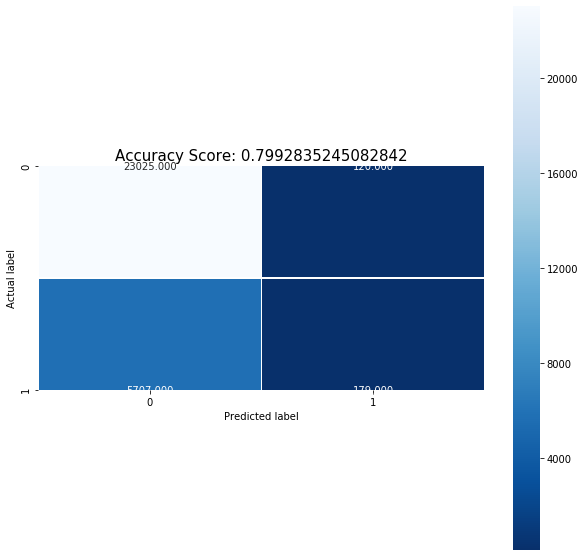

In [0]:
###### To plot the confusion matrix ############
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

In [0]:
################################## Decision Trees ###################################
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


0.7198167476146189
0.3267670915411356


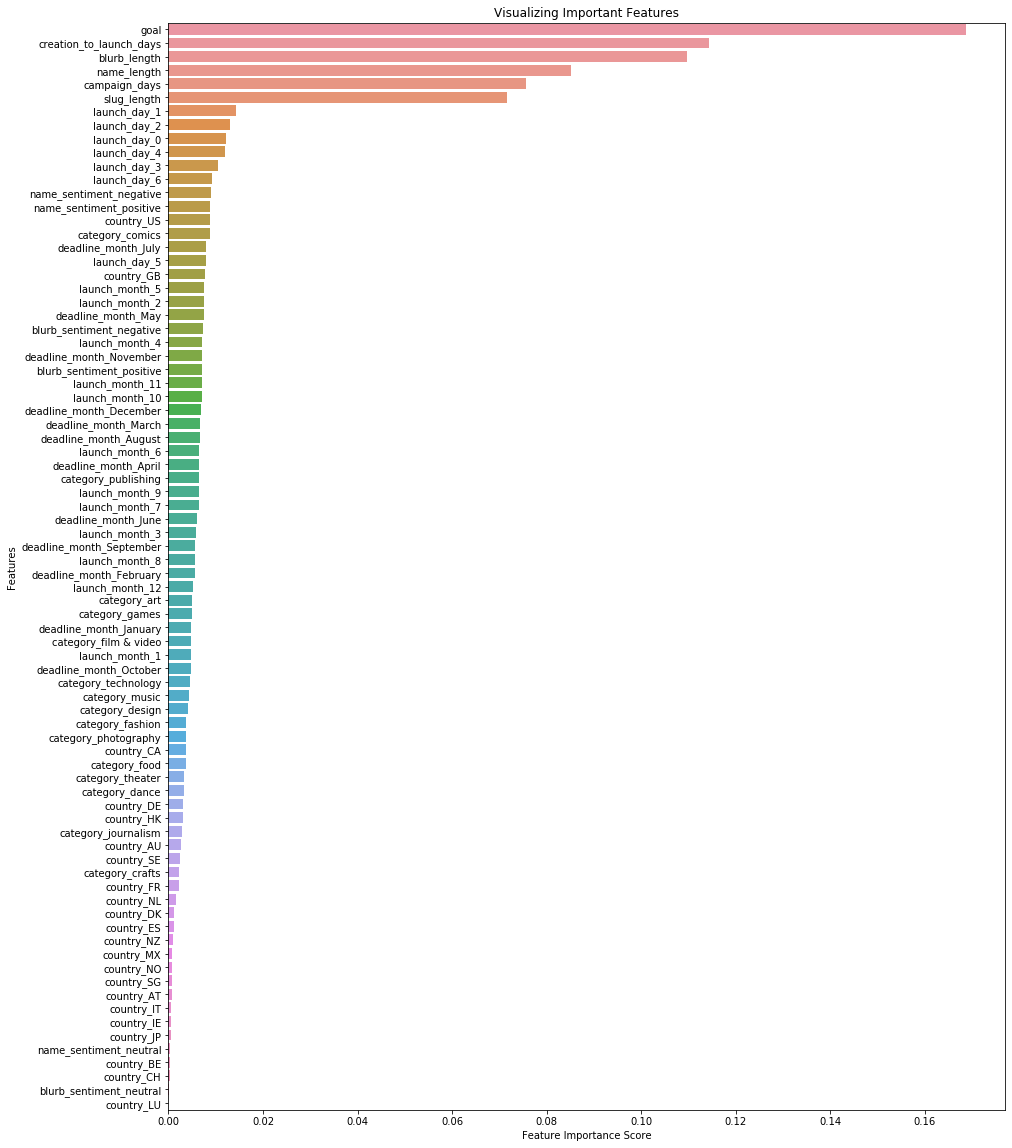

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
################################## SVM ###################################
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7983534842065378
0.01943048576214405


In [0]:
################ Random Forests ##############3
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     23145
           1       0.59      0.14      0.22      5886

    accuracy                           0.81     29031
   macro avg       0.70      0.56      0.56     29031
weighted avg       0.77      0.81      0.75     29031



In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8058282525576108
0.22258998758791892


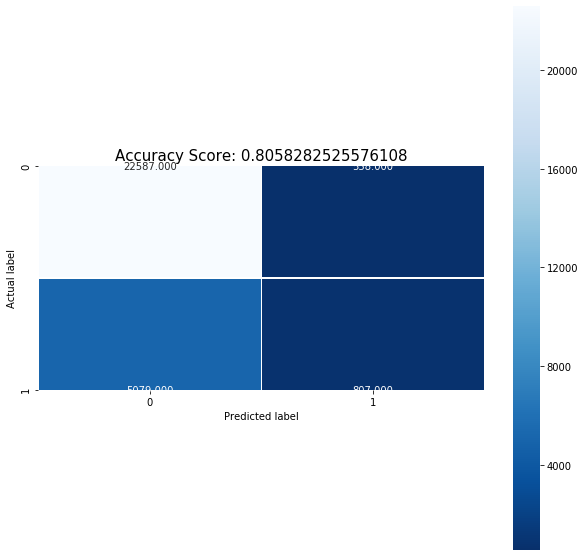

In [0]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

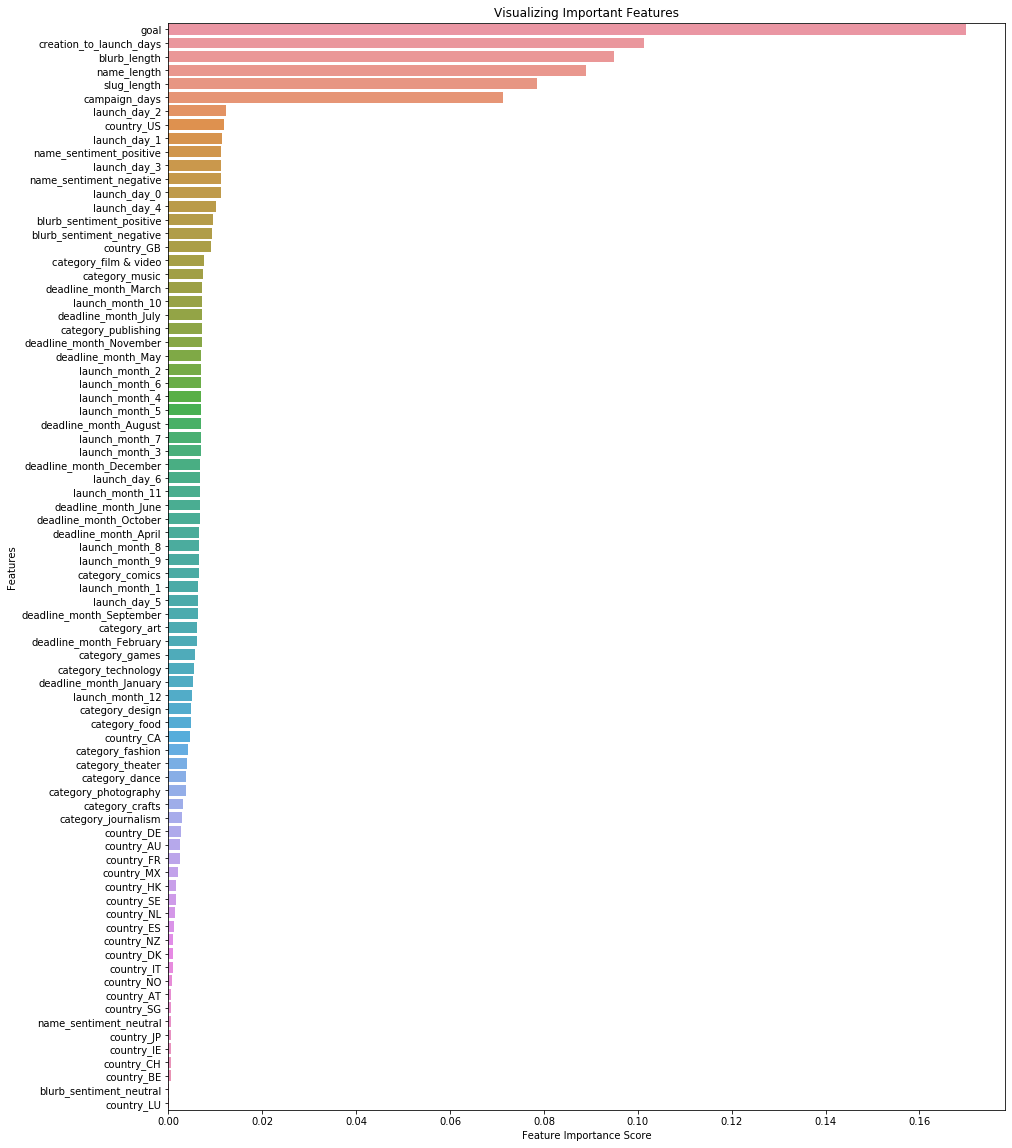

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
############################# Doing sampling to deal with the problem of class imbalance ##############################################

X_picked = only_success[only_success.staff_pick == 1]
X_not_picked = only_success[only_success.staff_pick == 0].sample(frac=0.30)





In [0]:
len(X_not_picked)

23131

In [0]:
len(X_picked)

19666

In [0]:
only_success_sampled = pd.concat([X_picked,X_not_picked])


In [0]:
# working with only the successful ones
X_temp = only_success_sampled.drop(['state_bool', 'staff_pick'], axis=1)
y = only_success_sampled.staff_pick

print("Length of X_temp is {}".format(len(X_temp)))
print("Length of y is {}".format(len(y)))

Length of X_temp is 42797
Length of y is 42797


In [0]:
##########Pre-processing############
########### Standardizing the data ################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X_temp), columns=list(X_temp.columns))
X.head()

,goal,slug_length,campaign_days,creation_to_launch_days,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,...,launch_day_0,launch_day_1,launch_day_2,launch_day_3,launch_day_4,launch_day_5,launch_day_6,deadline_month_April,deadline_month_August,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,name_sentiment_negative,name_sentiment_neutral,name_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,blurb_sentiment_positive
0,-0.034186,-0.061086,-0.114679,-0.333219,-0.039001,-0.131364,-0.045133,-0.208685,-0.044347,-0.113678,-0.063337,-0.076808,-0.1123,-0.354338,-0.069206,-0.046161,-0.072861,-0.045392,-0.014503,-0.102737,-0.0765,-0.041618,-0.062589,-0.070724,-0.05168,...,2.129229,-0.542197,-0.465758,-0.421332,-0.397913,-0.268007,-0.251239,3.116511,-0.304159,-0.303379,-0.266099,-0.236724,-0.327255,-0.316333,-0.324183,-0.324227,-0.307767,-0.297043,-0.280565,-0.569283,-0.040185,0.571765,-0.470654,-0.017431,0.471135
1,0.011986,0.013222,-0.405921,-0.252185,-0.039001,-0.131364,-0.045133,-0.208685,-0.044347,-0.113678,-0.063337,-0.076808,-0.1123,-0.354338,-0.069206,-0.046161,-0.072861,-0.045392,-0.014503,-0.102737,-0.0765,-0.041618,-0.062589,-0.070724,-0.05168,...,-0.469653,1.844349,-0.465758,-0.421332,-0.397913,-0.268007,-0.251239,-0.320872,-0.304159,-0.303379,-0.266099,-0.236724,3.055722,-0.316333,-0.324183,-0.324227,-0.307767,-0.297043,-0.280565,-0.569283,-0.040185,0.571765,-0.470654,-0.017431,0.471135
2,-0.022062,-0.061086,-0.114679,-0.289019,-0.039001,-0.131364,-0.045133,-0.208685,-0.044347,-0.113678,-0.063337,-0.076808,-0.1123,-0.354338,-0.069206,-0.046161,-0.072861,-0.045392,-0.014503,-0.102737,-0.0765,-0.041618,-0.062589,-0.070724,-0.05168,...,-0.469653,-0.542197,-0.465758,2.373423,-0.397913,-0.268007,-0.251239,3.116511,-0.304159,-0.303379,-0.266099,-0.236724,-0.327255,-0.316333,-0.324183,-0.324227,-0.307767,-0.297043,-0.280565,-0.569283,-0.040185,0.571765,-0.470654,-0.017431,0.471135
3,0.123422,-0.358317,-1.085487,-0.311119,-0.039001,7.612426,-0.045133,-0.208685,-0.044347,-0.113678,-0.063337,-0.076808,-0.1123,-0.354338,-0.069206,-0.046161,-0.072861,-0.045392,-0.014503,-0.102737,-0.0765,-0.041618,-0.062589,-0.070724,-0.05168,...,-0.469653,-0.542197,2.147039,-0.421332,-0.397913,-0.268007,-0.251239,-0.320872,-0.304159,-0.303379,-0.266099,-0.236724,-0.327255,-0.316333,3.084677,-0.324227,-0.307767,-0.297043,-0.280565,-0.569283,-0.040185,0.571765,-0.470654,-0.017431,0.471135
4,-0.019637,-0.878472,-0.017598,-0.266918,-0.039001,-0.131364,-0.045133,-0.208685,-0.044347,-0.113678,-0.063337,-0.076808,-0.1123,2.822162,-0.069206,-0.046161,-0.072861,-0.045392,-0.014503,-0.102737,-0.0765,-0.041618,-0.062589,-0.070724,-0.05168,...,-0.469653,1.844349,-0.465758,-0.421332,-0.397913,-0.268007,-0.251239,-0.320872,-0.304159,-0.303379,-0.266099,-0.236724,-0.327255,-0.316333,-0.324183,3.084258,-0.307767,-0.297043,-0.280565,1.756597,-0.040185,-1.748970,-0.470654,-0.017431,0.471135


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Length of training set is {}".format(len(X_train)))
print("Length of test set is {}".format(len(X_test)))

print("Shape of X_train is {}".format(X_train.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_test is {}".format(y_test.shape))

Length of training set is 29957
Length of test set is 12840
Shape of X_train is (29957, 80)
Shape of y_train is (29957,)
Shape of X_test is (12840, 80)
Shape of y_test is (12840,)


In [0]:
############## Logistic Regression Model ##############
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(score)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_pred = logisticRegr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.64898753894081
0.64898753894081
0.5656740869230028


In [0]:
from sklearn.metrics import classification_report
y_pred = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      6948
           1       0.65      0.50      0.57      5892

    accuracy                           0.65     12840
   macro avg       0.65      0.64      0.64     12840
weighted avg       0.65      0.65      0.64     12840



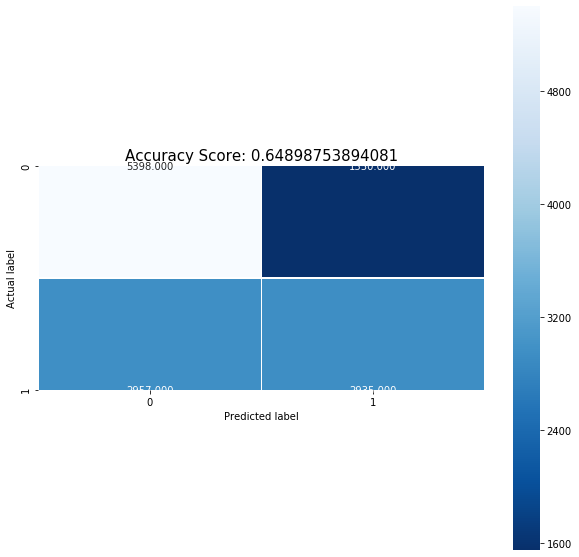

In [0]:
###### To plot the confusion matrix ############
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

In [0]:
################################## Decision Trees ###################################
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5865264797507788
0.5488996516271561


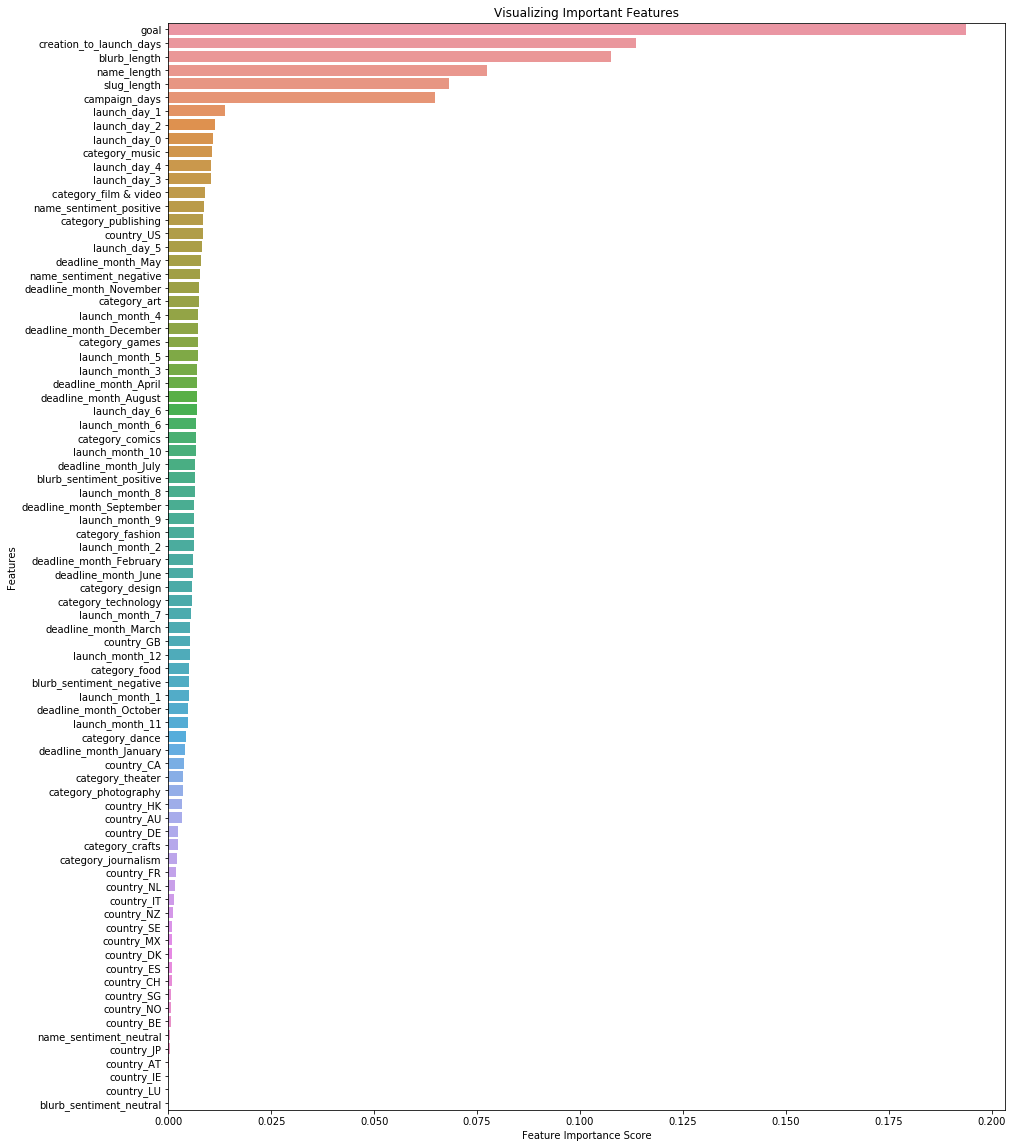

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
################ Random Forests ##############3
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6948
           1       0.67      0.60      0.64      5892

    accuracy                           0.68     12840
   macro avg       0.68      0.68      0.68     12840
weighted avg       0.68      0.68      0.68     12840



In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6834112149532711
0.6366967557422469


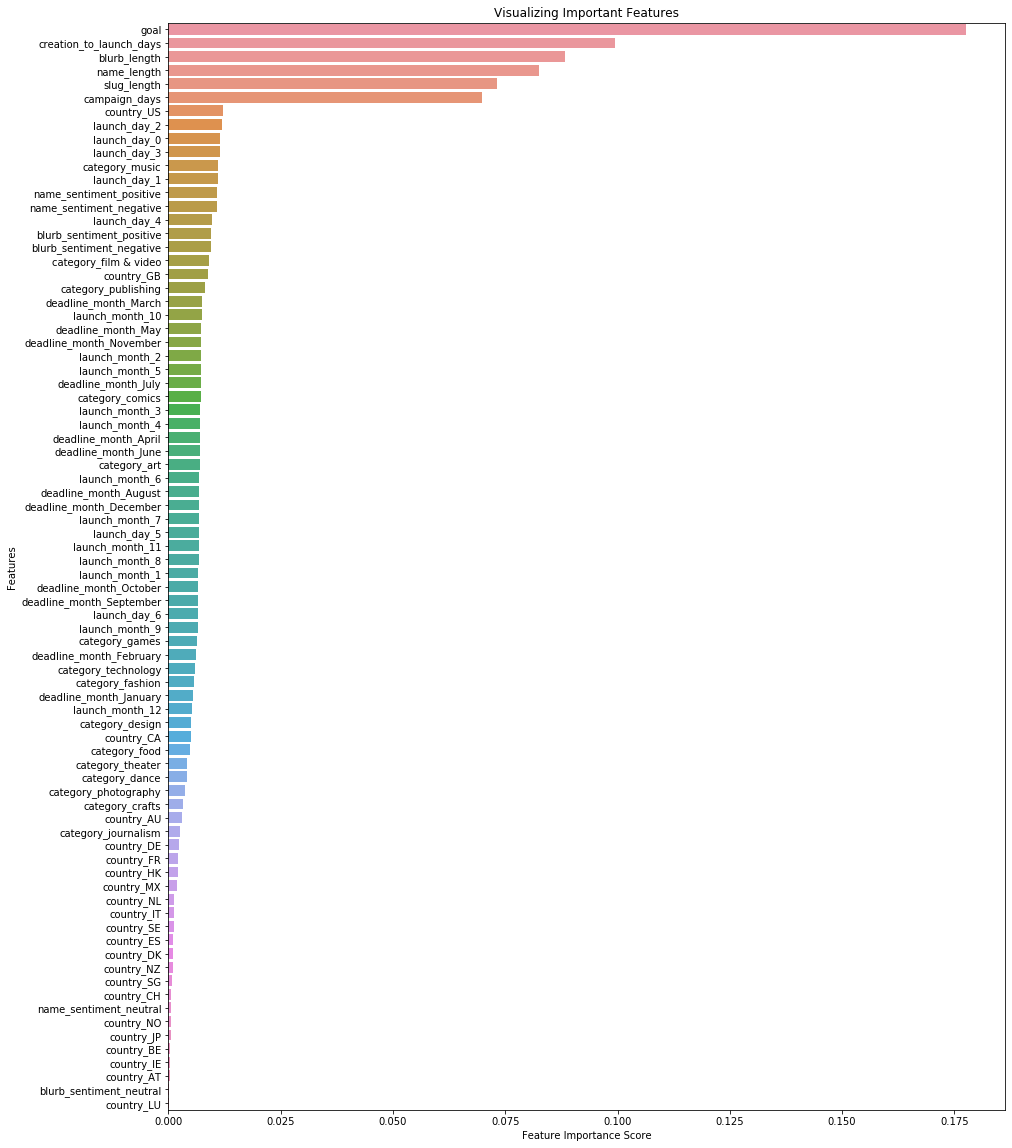

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_temp.columns).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('ferature_importance.png')
plt.show()

In [0]:
################################## SVM ###################################
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6038161993769471
0.5355610335068018


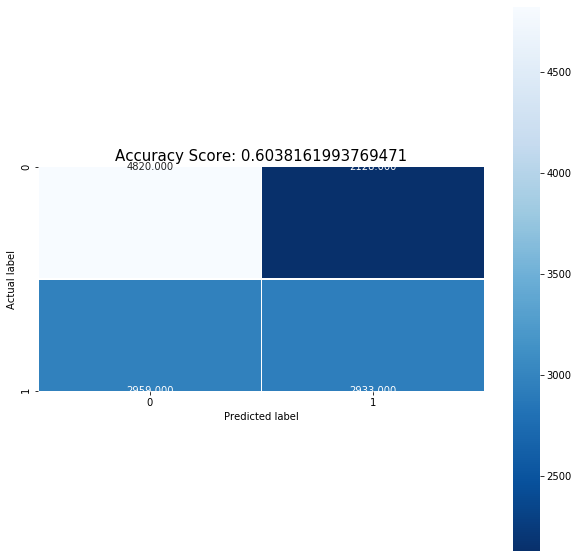

In [0]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.3, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);